In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

In [112]:
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_09-37-56"

# seed=1 multi=2 d=10 m=5 teacher_strength_decay=1 lr=0.02 use_sgd=true N_train=50 num_epoch=50 num_iter_per_epoch=100 batchsize=8 theory_suggest_train=true lr_reduction=20
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_11-17-23"

# same as above, but GD
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_13-31-25"

# python two_layer_new2.py seed=1 multi=2 d=10 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=50 num_epoch=50 num_iter_per_epoch=1000 batchsize=8 theory_suggest_train=true
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_13-32-50"

# python two_layer_new2.py seed=1 multi=2 d=10 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=50 num_epoch=50 num_iter_per_epoch=5000 batchsize=8 theory_suggest_train=true
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_13-51-29"

# python two_layer_new2.py seed=24 multi=2 d=10 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=50 num_epoch=50 num_iter_per_epoch=5000 batchsize=8 theory_suggest_train=true
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_20-25-26"

# Standard GD
# python two_layer_new2.py seed=24 multi=2 d=10 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=false N_train=50 num_epoch=50 num_iter_per_epoch=5000 theory_suggest_train=true
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_20-33-32"

# same but without theory data (still stuck at local minima)

# python two_layer_new2.py seed=24 multi=2 d=10 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=50 num_epoch=50 num_iter_per_epoch=5000 batchsize=8 theory_suggest_train=true
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_20-40-50"

path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_21-05-03"

# N_train = 100, and it works with the same seed :) 
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_21-07-59"

# N_train = 25
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_21-13-46"

# N_train = 25 but with 20 epochs
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_21-15-39"

# 30 epochs and lr = 0.02
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_21-19-22"

# 30 epochs with lr = 0.02
path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_21-42-51"

# A perfect case.
# python two_layer_new2.py seed=1354 multi=2 d=10 m=5 teacher_strength_decay=1 lr=0.01 use_sgd=true N_train=50 num_epoch=50 num_iter_per_epoch=5000 batchsize=8
# path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_20-51-12"

# another perfect case. 
# path = "/private/home/yuandong/dl_theory2/outputs/2019-09-12_20-58-52"

args = yaml.load(open(os.path.join(path, "config.yaml"), "r"))
stats = torch.load(os.path.join(path, "stats.pickle"))

final_g1_norm: 0.0006085677573057065


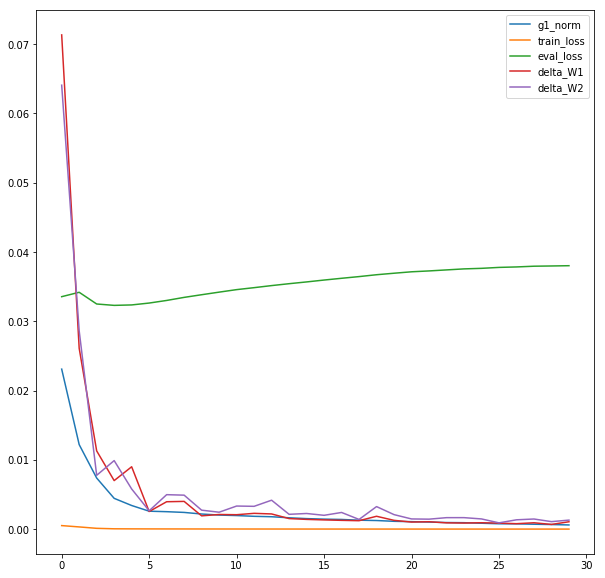

In [113]:
g1_norms = []
train_loss = []
eval_loss = []
delta_W1 = []
delta_W2 = []

plt.figure(figsize=(10, 10))

seed = next(iter(stats.keys()))

for d in stats[seed][1:]:
    g1_norms.append(d["g1_train"].norm() / d["g1_train"].size(0))
    train_loss.append(d["train_loss"].item())
    eval_loss.append(d["eval_loss"].item())
    delta_W1.append(d["deltaW1_s"].norm())
    delta_W2.append(d["deltaW2_s"].norm())
   
print(f"final_g1_norm: {g1_norms[-1].item()}")

plt.plot(g1_norms, label="g1_norm")
plt.plot(train_loss, label="train_loss")
plt.plot(eval_loss, label="eval_loss")
plt.plot(delta_W1, label="delta_W1")
plt.plot(delta_W2, label="delta_W2")

plt.legend()

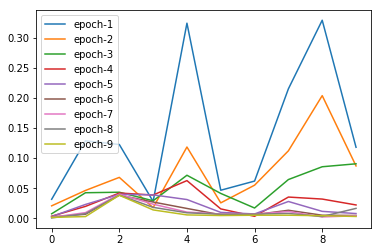

In [114]:
for i in range(1, 10):
    d = stats[seed][i]
    plt.plot(d["g1_train"].norm(dim=0)[:-1].numpy(), label=f"epoch-{i}")
plt.legend()


In [37]:
d["g1_train"].size()

torch.Size([45, 11])

In [41]:
d["train_loss"]

tensor(7.4769e-05, dtype=torch.float64)

In [68]:
d["corr_train"].max(dim=1)

(tensor([0.5856, 0.9933, 0.8968, 0.7735, 0.9530], dtype=torch.float64),
 tensor([4, 8, 0, 7, 1]))

In [69]:
d["corr_eval"].max(dim=1)

(tensor([0.6908, 0.9581, 0.6681, 0.4623, 0.7873], dtype=torch.float64),
 tensor([4, 8, 0, 7, 1]))

In [53]:
len(stats[1])

51

In [56]:
d["g1_train"].size()

torch.Size([45, 11])